# Fit of `B0_M` of the recontructed $B^0 \to D^*K \pi^+\pi^-$ decay
- **Model**: sum of
    - A crystal ball with left powertail
    - A crystal ball with right powertail
- **Data** : `RapidSim` simulated of $B^0 \to D^*K \pi^+\pi^-$ with $K$ misidentified as a $\pi$ of same charge

## Libraries

In [1]:
import numpy as np
import zfit
import matplotlib.pyplot as plt
import json
#Gives us nice LaTeX fonts in the plots
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)


from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, plot_hist_fit, save_params, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Retrieve data

In [2]:
df = fct.load_data(years,magnets,type_data = 'data_KPiPi',vars = ['B0_M_Tau_Pi12pip'])

/afs/cern.ch/user/d/dhill/public/forAnthony/Bd2DstKPiPi.root


In [3]:
name_data = 'data_KPiPi_2'
var = 'B0_M_Tau_Pi12pip'
low = 4.3
high = 5.35

## Plot 1D histograms

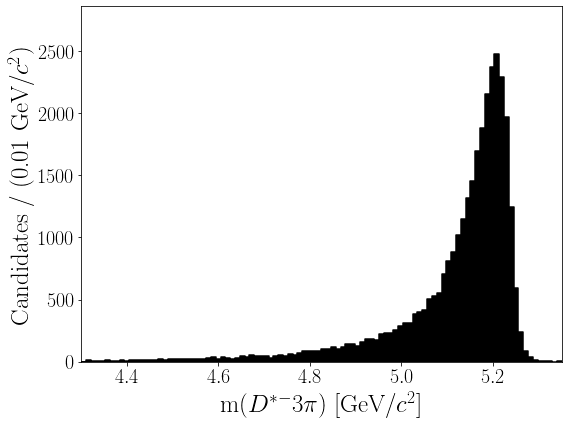

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_2/B0_M_Tau_Pi12pip_data_KPiPi_2.pdf


In [18]:
fct.plot_hist_particle({name_data:df}, var, n_bins = 100, name_folder = name_data, colors='black', mode_hist=True,
                      low=low, high=high)

## Two opposed Crystall ball Fit

In [4]:
obs = zfit.Space("x", limits=(low, high))

In [5]:
# name        value    minuit_hesse         minuit_minos    at limit
# --------  -------  --------------  -------------------  ----------
# fraction   0.8774     +/-   0.014  -  0.014   +  0.024       False
# alphaL     0.2519     +/-  0.0088  -  0.017   +  0.023       False
# muL         5.214     +/- 0.00059  - 0.0013   + 0.0011       False
# nL          4.566     +/-    0.18  -   0.27   +   0.18       False
# sigmaL    0.02086     +/- 0.00051  -0.00051   + 0.0011       False
# alphaR     -2.505     +/-     4.4  -    3.7   +    3.7       False
# muR         5.183     +/-   0.003  - 0.0045   +  0.003       False
# nR          46.42     +/- 3.4e+03  -     51   +     51       False
# sigmaR    0.04053     +/-  0.0024  - 0.0026   + 0.0024       False

muL = zfit.Parameter("muL", 5.2, 5.15, 5.23)
muR = zfit.Parameter("muR", 5.2, 5.15, 5.23)

sigmaL = zfit.Parameter("sigmaL", 0.02, 0.01, 0.1)
sigmaR = zfit.Parameter("sigmaR", 0.04, 0.01, 0.1)

alphaL = zfit.Parameter("alphaL", 0.3, 0.01, 2.)
alphaR = zfit.Parameter("alphaR", -1.8, -5., -0.1)

nL = zfit.Parameter("nL", 4., 0.1, 10.)
nR = zfit.Parameter("nR", 45., 1., 60.)

frac = zfit.Parameter("fraction", 0.9, 0, 3.) # fraction between L and R

In [6]:
name_params = {
    'muL':'$\\mu_L$',
    'sigmaL':'$\\sigma_L$',
    'muR':'$\\mu_R$',
    'sigmaR':'$\\sigma_R$',
    'alphaL':'$\\alpha_L$',
    'alphaR':'$\\alpha_R$',
    'nL':'$n_L$',
    'nR':'$n_R$',
}

In [7]:
# doubleCB = zfit.pdf.DoubleCB(mu, sigma, alphaL, alphaR, nL, nR, obs=obs)

crystalBallL = zfit.pdf.CrystalBall(muL, sigmaL, alphaL, nL, obs=obs)
crystalBallR = zfit.pdf.CrystalBall(muR, sigmaR, alphaR, nR, obs=obs)
# gaussianR = zfit.pdf.Gauss(muR, sigmaR, obs=obs)

model = zfit.pdf.SumPDF([crystalBallL, crystalBallR], fracs=frac) # crystalBallR is multiplied by fracs

data = zfit.Data.from_pandas(df[var],obs=obs)

In [ ]:
result, params = launch_fit(model, data) # I performed 2 fits for the last fit to converge ...

    ------------------------------------------------------------------
    | FCN = -3.32e+04               |     Ncalls=134 (134 total)     |
    | EDM = 0.000102 (Goal: 0.001)  |            up = 0.5            |
    ------------------------------------------------------------------
    |  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
    ------------------------------------------------------------------
    |     True      |     True      |   False   |       False        |
    ------------------------------------------------------------------
    | Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
    ------------------------------------------------------------------
    |     False     |     True      |   True    |   True    | False  |
    ------------------------------------------------------------------
    name        value    minuit_hesse         minuit_minos    at limit
    --------  -------  --------------  -------------------  ----------
    fraction   0.8773     +/-   0.019  -  0.019   +  0.024       False
    alphaL     0.2518     +/-   0.019  -  0.017   +  0.019       False
    muL         5.214     +/-  0.0012  - 0.0012   + 0.0011       False
    nL          4.565     +/-    0.29  -   0.27   +    0.3       False
    sigmaL    0.02085     +/- 0.00085  -0.00077   + 0.0011       False
    alphaR     -2.509     +/-     1.5  -    1.4   +   0.66       False
    muR         5.183     +/-  0.0031  - 0.0031   + 0.0027       False
    nR          44.82     +/-   1e+03  -     44   +     50       False
    sigmaR    0.04054     +/-  0.0017  - 0.0026   + 0.0017       False


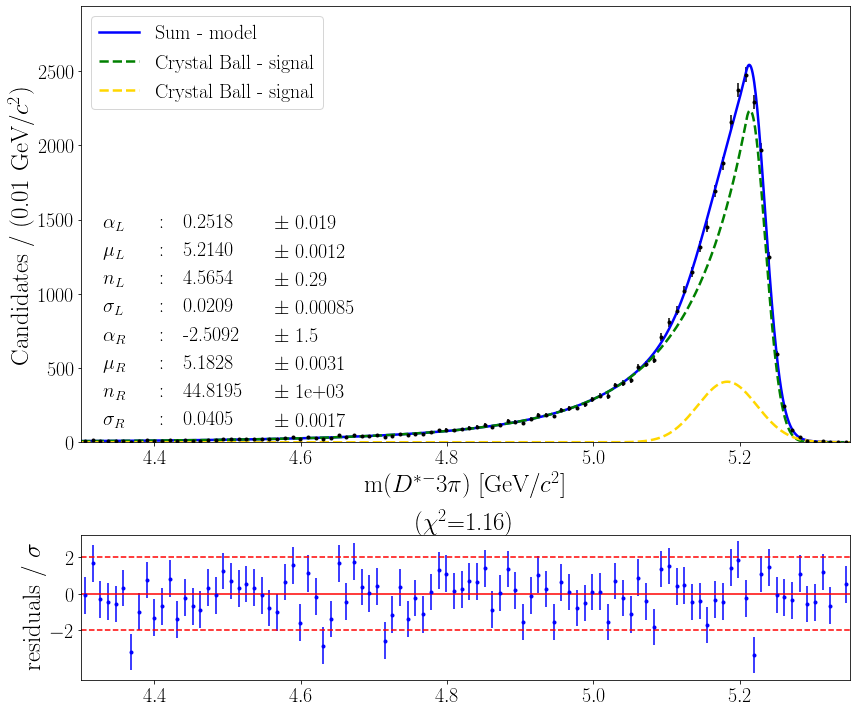

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_2/B0_M_Tau_Pi12pip_data_KPiPi_2_chi2_fit.pdf


In [21]:
plot_hist_fit_particle(df, var, models = [model, crystalBallL, crystalBallR], obs=obs, n_bins = 100,mode_hist = False,
                       name_folder = name_data, type_models= 'mss', loc_res='lower left',
                       name_data = name_data+'_chi2', params=params, name_params=name_params, show_chi2=True,
                       frac = float(frac))   

In [22]:
save_params(params, name_data, True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/data_KPiPi_2_params.json
